In [1]:
import pandas as pd
import numpy as np
import os

from pathlib import Path

In [ ]:
root = Path("./target/okx_btcusdt_features")

all_files = root.rglob("*.parquet") 
all_files = list(all_files)[:]

books = pd.read_parquet(all_files)

In [3]:
books.shape

(2678400, 105)

In [8]:
books.head()

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_41,bid_size_42,bid_size_43,bid_size_44,bid_size_45,bid_size_46,bid_size_47,bid_size_48,bid_size_49,bid_size_50
0,1761696001000,2025-10-29T00:00:01.000Z,112894.820136,0.012351,0.000000,0.034929,0.028835,0.032200,0.032200,0.03220,...,0.133517,0.278683,0.019367,0.000041,0.000886,0.000356,0.010000,0.000010,0.042742,0.000010
1,1761696002000,2025-10-29T00:00:02.000Z,112897.539898,0.000266,0.005703,1.218828,0.032200,0.078267,0.100000,0.13000,...,0.278683,0.132700,0.001868,0.017000,0.017000,0.031843,0.067474,0.017000,0.014495,0.000356
2,1761696003000,2025-10-29T00:00:03.000Z,112892.798239,0.116359,0.147538,0.770129,0.032200,0.290271,0.178541,0.03220,...,0.000178,0.278683,0.000010,0.000011,0.000015,0.017300,0.353189,0.000178,0.000312,0.278861
3,1761696004000,2025-10-29T00:00:04.000Z,112882.343624,0.001739,0.001759,0.795880,0.032200,0.066052,0.032200,0.03220,...,0.100399,0.017044,0.000178,0.278683,0.000010,0.000011,0.000015,0.001875,0.017300,0.353189
4,1761696005000,2025-10-29T00:00:05.000Z,112881.760828,0.000646,0.010973,0.892861,0.344196,0.117071,0.368105,0.40914,...,0.000886,0.001781,0.000178,0.188791,0.298051,0.000026,0.000049,0.000010,0.000010,0.002236


In [9]:
books.tail()

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_41,bid_size_42,bid_size_43,bid_size_44,bid_size_45,bid_size_46,bid_size_47,bid_size_48,bid_size_49,bid_size_50
259195,1761955196000,2025-10-31T23:59:56.000Z,-1.000000,0.000000,0.000000,0.410408,0.111931,0.031848,0.0528,0.0528,...,0.135000,0.000022,0.001836,0.000850,0.000052,0.000046,0.067474,0.082170,0.120000,0.150929
259196,1761955197000,2025-10-31T23:59:57.000Z,109604.013149,0.000000,0.002280,0.310408,0.111931,0.031848,0.0528,0.0528,...,0.135000,0.000022,0.002686,0.000052,0.000046,0.067474,0.082170,0.120000,0.150929,0.207628
259197,1761955198000,2025-10-31T23:59:58.000Z,-1.000000,0.000000,0.000000,0.302745,0.111931,0.031848,0.0528,0.0528,...,0.000022,0.037400,0.002686,0.000052,0.000046,0.067474,0.082170,0.120000,0.150929,0.207628
259198,1761955199000,2025-10-31T23:59:59.000Z,109604.099810,0.203250,0.000687,0.391892,0.111931,0.031848,0.0528,0.0528,...,0.037400,0.002686,0.000052,0.000046,0.067474,0.082170,0.120000,0.150929,0.207628,0.303181
259199,1761955200000,2025-11-01T00:00:00.000Z,109604.110951,0.002737,0.000000,0.389201,0.111931,0.031848,0.0528,0.0528,...,0.000022,0.037400,0.002686,0.000052,0.000046,0.067474,0.082170,0.120000,0.150929,0.207628


### VWAP Cleaning

In [10]:
books.loc[(books.buy_volume == 0) & (books.sell_volume == 0), 'vwap'] = np.nan
books = books.ffill()

### EDA

In [21]:
books[(books.buy_volume == 0) & (books.sell_volume == 0)]

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_41,bid_size_42,bid_size_43,bid_size_44,bid_size_45,bid_size_46,bid_size_47,bid_size_48,bid_size_49,bid_size_50
31,1759276832000,2025-10-01T00:00:32.000Z,114096.750336,-0.0,-0.0,0.478251,0.042133,0.032400,0.076971,0.057626,...,0.075988,0.001000,0.000710,0.001807,0.004381,0.526997,0.237046,0.000010,0.079067,0.001000
34,1759276835000,2025-10-01T00:00:35.000Z,114096.986328,-0.0,-0.0,0.855744,0.035000,0.032400,0.076971,0.057626,...,0.526997,0.237046,0.000010,0.079067,0.001000,0.004381,0.000710,0.001807,0.001753,0.064442
37,1759276838000,2025-10-01T00:00:38.000Z,114096.308442,-0.0,-0.0,1.150234,0.035000,0.032400,0.076971,0.027647,...,0.000010,0.079067,0.001000,0.004381,0.000710,0.001807,0.001753,0.064442,0.001888,0.526244
39,1759276840000,2025-10-01T00:00:40.000Z,114096.721078,-0.0,-0.0,0.967343,0.035000,0.040209,0.076971,0.027647,...,0.010000,0.000010,0.079067,0.001000,0.004381,0.000710,0.001807,0.001753,0.064442,0.001888
41,1759276842000,2025-10-01T00:00:42.000Z,114096.691395,-0.0,-0.0,0.811241,0.035000,0.040209,0.076971,0.027647,...,0.001807,0.004381,0.025945,0.526966,0.237046,0.000010,0.079067,0.001000,0.000710,0.001807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259191,1759535992000,2025-10-03T23:59:52.000Z,122212.922022,-0.0,-0.0,1.320398,0.068273,0.280860,0.086297,0.045409,...,0.134216,0.000994,0.000210,0.001754,0.067600,0.163322,0.013273,0.490834,0.366282,0.000097
259192,1759535993000,2025-10-03T23:59:53.000Z,122212.922022,-0.0,-0.0,1.110398,0.068273,0.280860,0.086297,0.045409,...,0.474391,0.490500,0.134216,0.000994,0.000210,0.001754,0.067600,0.163322,0.013273,0.490834
259193,1759535994000,2025-10-03T23:59:54.000Z,122212.922022,-0.0,-0.0,1.320398,0.068273,0.280860,0.086297,0.045409,...,0.036858,0.474391,0.490500,0.134216,0.000994,0.000210,0.001754,0.067600,0.163322,0.013273
259194,1759535995000,2025-10-03T23:59:55.000Z,122212.922022,-0.0,-0.0,0.063499,0.000491,0.012489,0.000010,0.039860,...,0.327416,0.000015,0.033521,0.000010,0.410677,0.024139,0.057200,0.327329,0.013273,0.000010


In [8]:
(books.buy_volume == 0).sum()

np.int64(132225)

<Axes: >

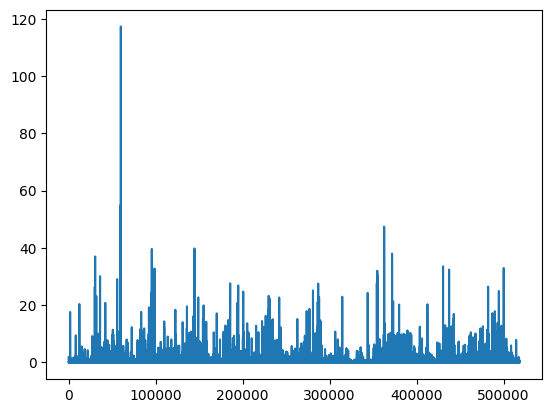

In [23]:
books.buy_volume.plot()

In [10]:
(books.sell_volume == 0).sum()

np.int64(39121)

<Axes: >

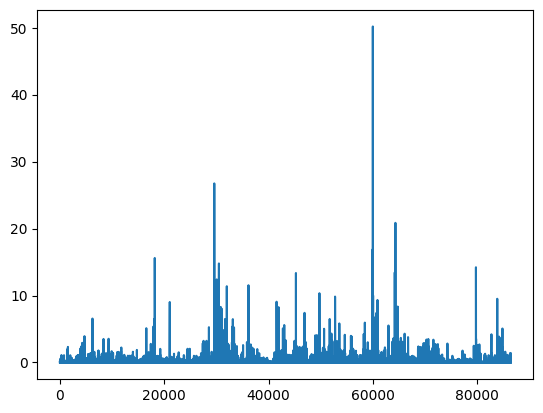

In [11]:
books.sell_volume.plot()

<Axes: >

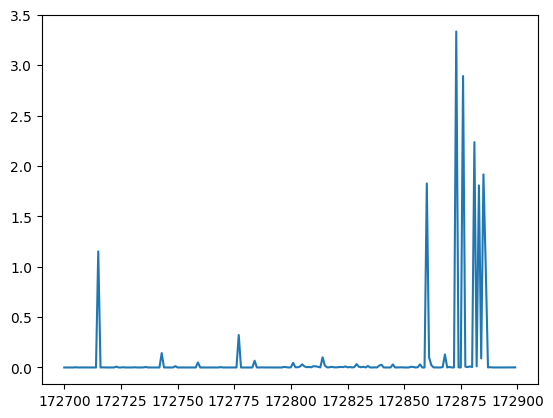

In [11]:
books.buy_volume[86400*2-100:86400*2+100].plot()

<Axes: >

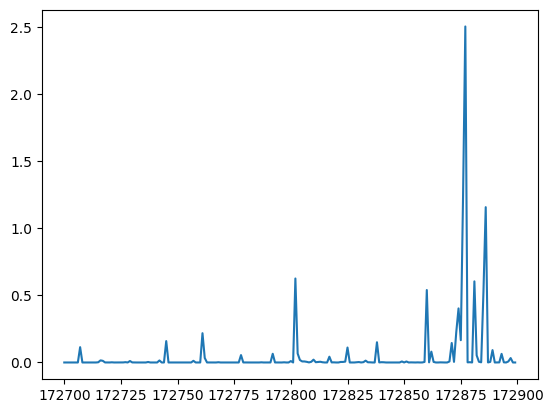

In [12]:
books.sell_volume[86400*2-100:86400*2+100].plot()

<Axes: >

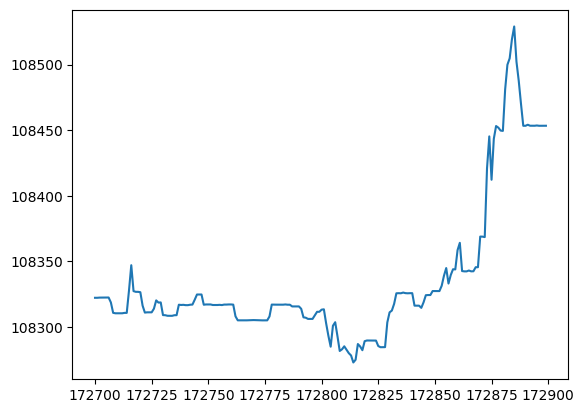

In [14]:
books.vwap[86400*2-100:86400*2+100].plot()

<Axes: >

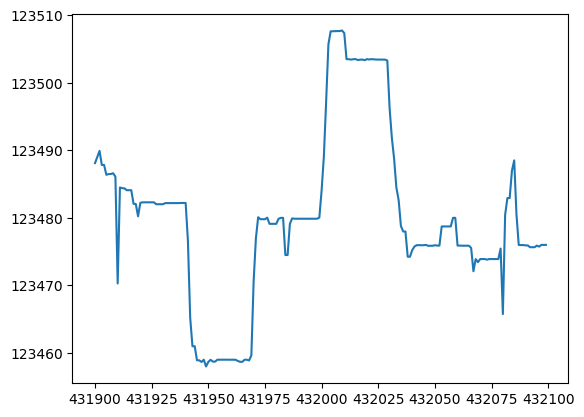

In [22]:
books.vwap[86400*5-100:86400*5+100].plot()

<Axes: >

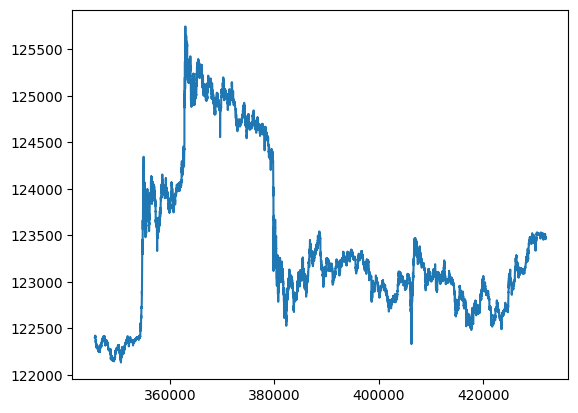

In [30]:
books.vwap[86400*4:86400*5].plot()

<Axes: >

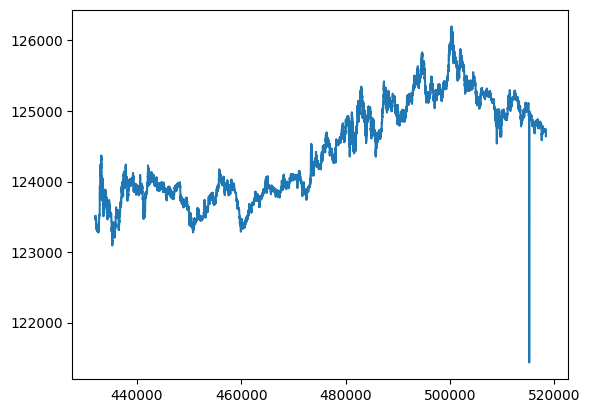

In [29]:
books.vwap[86400*5:].plot()

<Axes: >

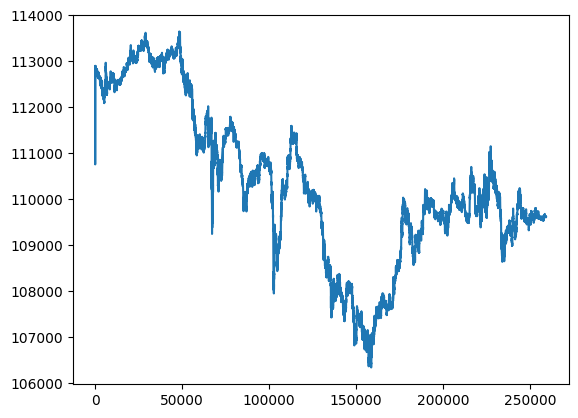

In [19]:
books.vwap.plot()

In [16]:
d = 50

<Axes: >

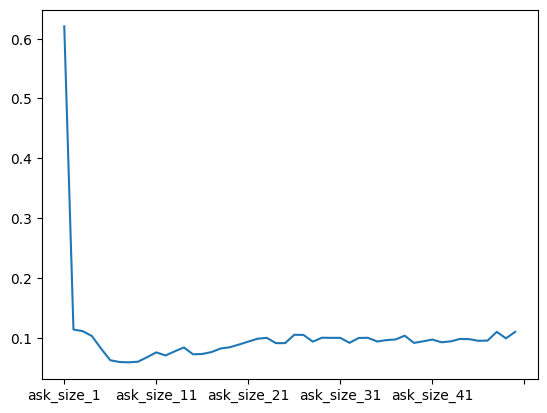

In [17]:
books.iloc[:1000, 5:5+d].mean().plot()

<Axes: >

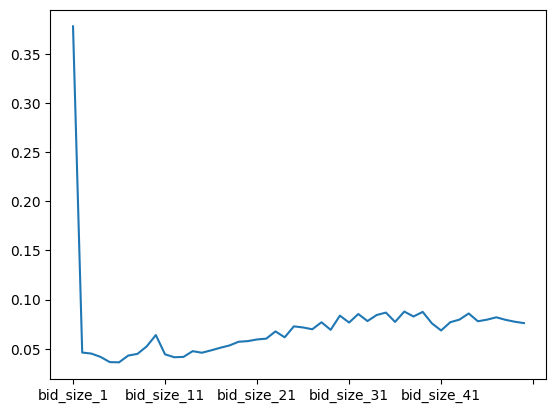

In [18]:
books.iloc[:1000, 5+d:5+2*d].mean().plot()